# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [6]:
def roll_dice(n=10):
    # Simula el lanzamiento del dado n veces
    results = random.choices(range(1, 7), k=n)
    
    # Crea un DataFrame con los resultados
    df = pd.DataFrame(results, columns=['Roll'])
    
    return df

# Llama a la función y guarda los resultados en un DataFrame
dice_rolls = roll_dice()
print(dice_rolls)

   Roll
0     5
1     1
2     6
3     3
4     6
5     3
6     1
7     3
8     3
9     6


#### 2.- Plot the results sorted by value.

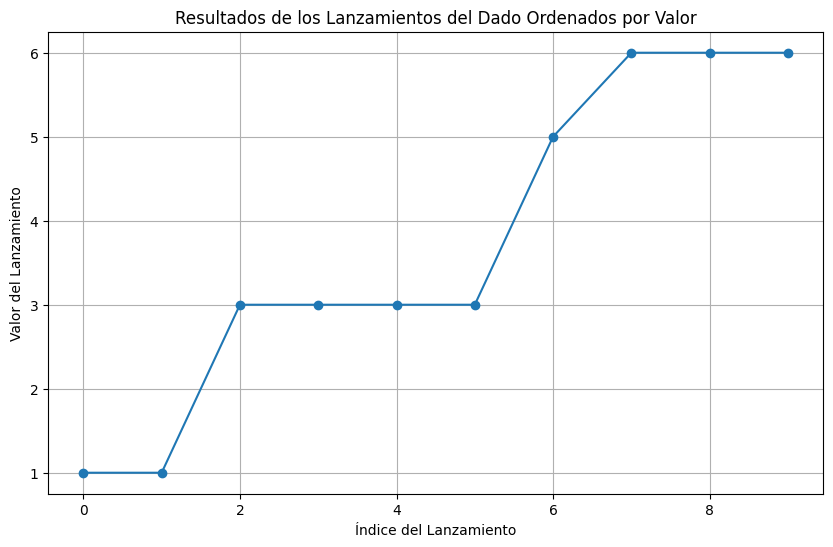

In [7]:
# Ordena el DataFrame por el valor del lanzamiento
sorted_dice_rolls = dice_rolls.sort_values(by='Roll').reset_index(drop=True)

# Traza los resultados ordenados
plt.figure(figsize=(10, 6))
plt.plot(sorted_dice_rolls.index, sorted_dice_rolls['Roll'], marker='o')
plt.title('Resultados de los Lanzamientos del Dado Ordenados por Valor')
plt.xlabel('Índice del Lanzamiento')
plt.ylabel('Valor del Lanzamiento')
plt.grid(True)
plt.show()

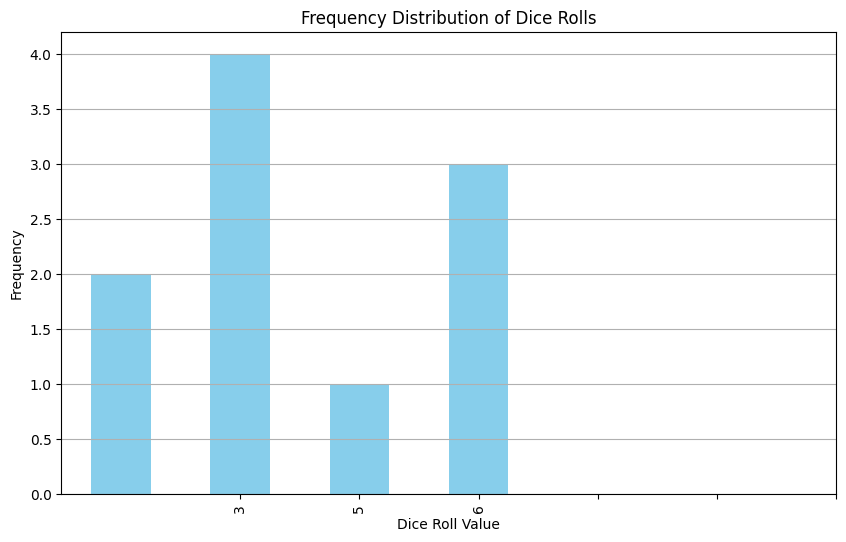

In [8]:
# your code here
frequency_distribution = dice_rolls['Roll'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Dice Rolls')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y')
plt.show()

In [ ]:
"""
The frequency distribution plot offers a compact view of the data, showing the overall distribution of dice roll values, which helps to identify the most and least common outcomes at a glance.
The sorted dice rolls plot, on the other hand, shows the same data in a more detailed manner, displaying each individual roll's result in order, which is less useful for understanding the overall frequency but helpful for seeing the exact sequence of rolls.

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def calculate_mean(dice_rolls):
    # Calculate the sum of all observations
    total_sum = sum(dice_rolls)
    
    # Calculate the number of observations
    num_observations = len(dice_rolls)
    
    # Calculate the mean
    mean_value = total_sum / num_observations
    
    return mean_value


dice_rolls = [1, 3, 5, 6, 2, 4, 6, 3, 2, 1]  
mean_value = calculate_mean(dice_rolls)
print(f"Mean value: {mean_value}")

Mean value: 3.3


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
# Sample data (dice rolls)
dice_rolls = [1, 3, 5, 6, 2, 4, 6, 3, 2, 1]

# Step 1: Calculate the frequency distribution
frequency_distribution = {}
for value in dice_rolls:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1

# Step 2: Calculate the sum of products and total frequency
sum_of_products = 0
total_frequency = len(dice_rolls)

for value, frequency in frequency_distribution.items():
    sum_of_products += value * frequency

# Step 3: Calculate the mean
mean_value = sum_of_products / total_frequency

print(f"The mean calculated from the frequency distribution is: {mean_value}")


The mean calculated from the frequency distribution is: 3.3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [16]:
def calculate_median(data):
    # Step 1: Sort the data
    sorted_data = sorted(data)
    
    # Step 2: Determine the number of observations
    n = len(sorted_data)
    
    # Step 3: Calculate the median based on n
    if n % 2 == 1:  # Odd number of observations
        median_index = n // 2
        median_value = sorted_data[median_index]
    else:           # Even number of observations
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median_value = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2
    
    return median_value

# Example usage:
data_odd = [1, 3, 5, 2, 4]         # Odd number of observations
data_even = [1, 3, 5, 2, 4, 6]     # Even number of observations

median_odd = calculate_median(data_odd)
median_even = calculate_median(data_even)

print(f"Median (Odd number of observations): {median_odd}")
print(f"Median (Even number of observations): {median_even}")


Median (Odd number of observations): 3
Median (Even number of observations): 3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
def calculate_median(data):
    # Step 1: Sort the data
    sorted_data = sorted(data)
    
    # Step 2: Determine the number of observations
    n = len(sorted_data)
    
    # Step 3: Calculate the median based on n
    if n % 2 == 1:  # Odd number of observations
        median_index = n // 2
        median_value = sorted_data[median_index]
    else:           # Even number of observations
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median_value = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2
    
    return median_value

def calculate_quartiles(data):
    # Step 1: Sort the data
    sorted_data = sorted(data)
    
    # Step 2: Calculate Q2 (median)
    q2 = calculate_median(sorted_data)
    
    # Step 3: Split the data into lower and upper halves
    n = len(sorted_data)
    if n % 2 == 1:
        lower_half = sorted_data[:n//2]
        upper_half = sorted_data[n//2 + 1:]
    else:
        lower_half = sorted_data[:n//2]
        upper_half = sorted_data[n//2:]
    
    # Step 4: Calculate Q1 (first quartile)
    q1 = calculate_median(lower_half)
    
    # Step 5: Calculate Q3 (third quartile)
    q3 = calculate_median(upper_half)
    
    return q1, q2, q3

# Example usage:
data = [12, 45, 78, 34, 56, 23, 67, 89, 43, 21]

q1, q2, q3 = calculate_quartiles(data)
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {q2}")
print(f"Third Quartile (Q3): {q3}")


First Quartile (Q1): 23
Median (Q2): 44.0
Third Quartile (Q3): 67


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [20]:
# your code here
df = pd.read_csv('/Users/paksivatkinavaleria/Desktop/bootcamp_ironhack/Modulo 2/lab_understanding_descriptive_stats-main/data/roll_the_dice_hundred.csv')
df


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


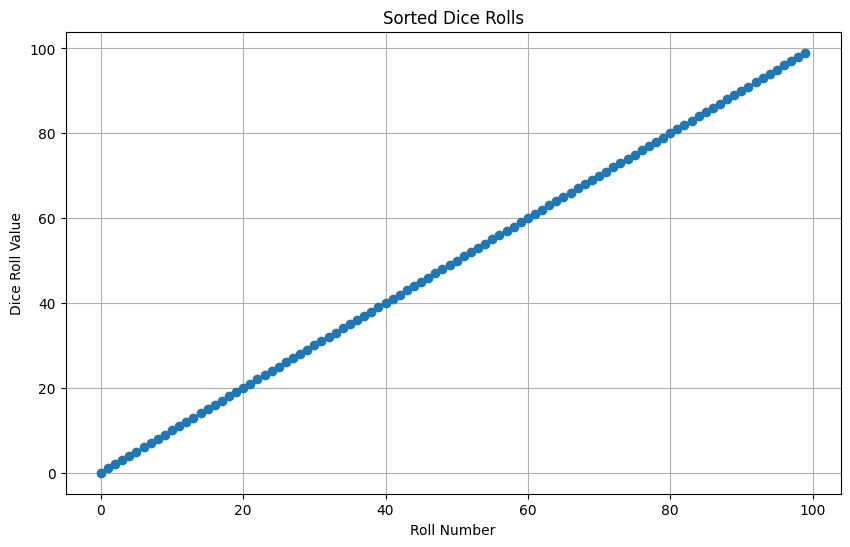

In [21]:

# Sort the values
sorted_df = df.sort_values(by='roll').reset_index(drop=True)

# Plot the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_df.index, sorted_df['roll'], marker='o', linestyle='-')
plt.title('Sorted Dice Rolls')
plt.xlabel('Roll Number')
plt.ylabel('Dice Roll Value')
plt.grid(True)
plt.show()

In [22]:
"""
there was a good spread of dice roll values, with no single value being overly dominant

"""

'\nthere was a good spread of dice roll values, with no single value being overly dominant\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [23]:
# your code here

dice_rolls = df['roll'].tolist()

# Function to calculate the mean (from Challenge 2)
def calculate_mean(data):
    # Calculate the sum of all observations
    total_sum = sum(data)
    
    # Calculate the number of observations
    num_observations = len(data)
    
    # Calculate the mean
    mean_value = total_sum / num_observations
    
    return mean_value

# Calculate the mean value of the hundred dice rolls
mean_value = calculate_mean(dice_rolls)
print(f"Mean value: {mean_value}")

Mean value: 49.5


#### 3.- Now, calculate the frequency distribution.


In [24]:
# your code here
dice_rolls = df['roll']

frequency_distribution = dice_rolls.value_counts().sort_index()

print(frequency_distribution)

roll
0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: count, Length: 100, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

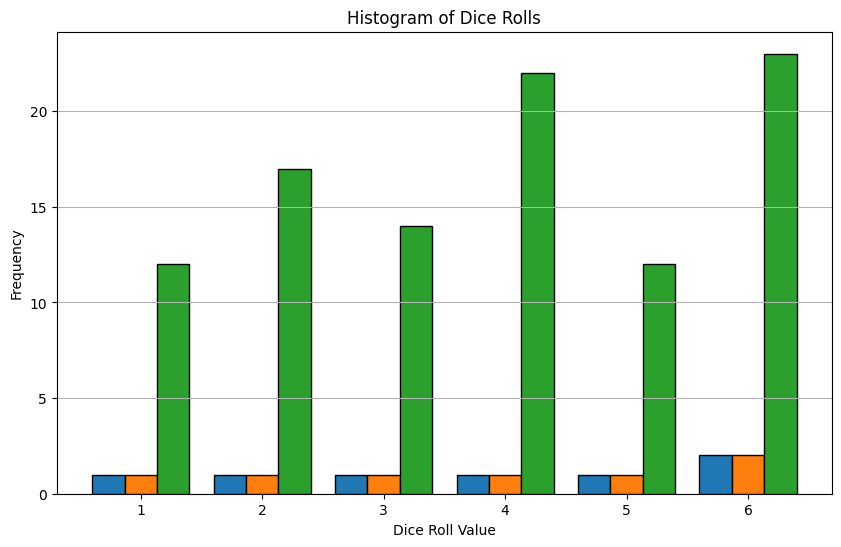

In [25]:
# your code here
plt.figure(figsize=(10, 6))
plt.hist(df, bins=range(1, 8), edgecolor='black', align='left')
plt.title('Histogram of Dice Rolls')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y')
plt.show()


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [26]:
# your code here
df = pd.read_csv('/Users/paksivatkinavaleria/Desktop/bootcamp_ironhack/Modulo 2/lab_understanding_descriptive_stats-main/data/roll_the_dice_thousand.csv')
df


,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


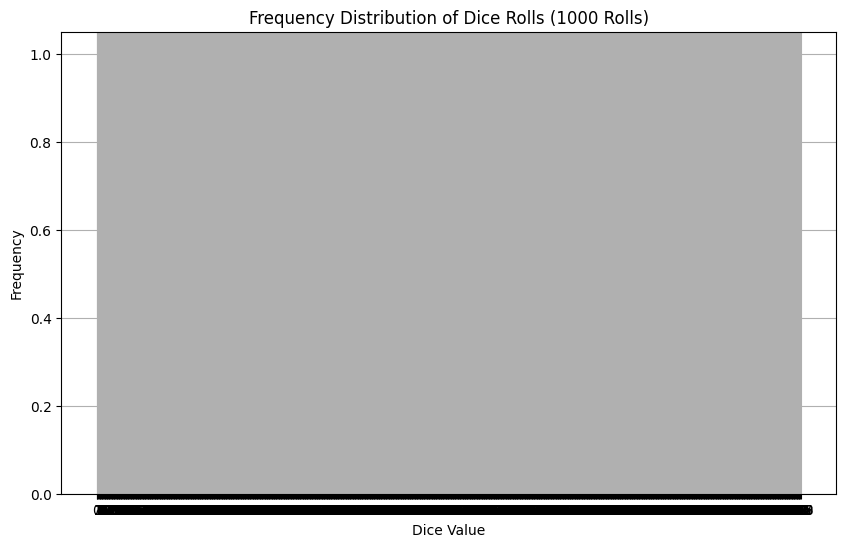

roll
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: count, Length: 1000, dtype: int64


In [28]:
# Calculate the frequency distribution
frequency_distribution = df['roll'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls (1000 Rolls)')
plt.xticks(frequency_distribution.index)
plt.grid(True)
plt.show()

# Print the frequency distribution
print(frequency_distribution)

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [29]:
# your code here
df = pd.read_csv('/Users/paksivatkinavaleria/Desktop/bootcamp_ironhack/Modulo 2/lab_understanding_descriptive_stats-main/data/ages_population.csv')
df

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


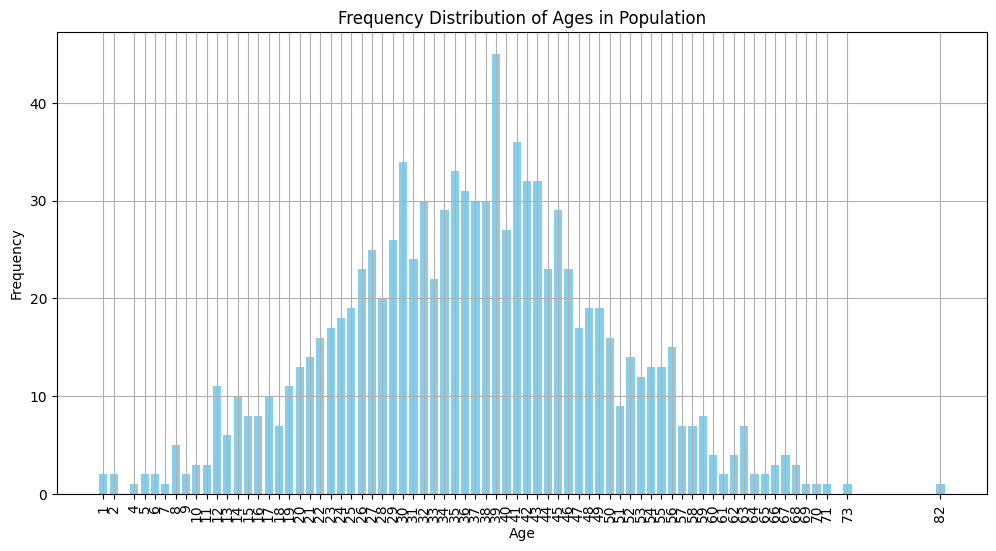

observation
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: count, Length: 72, dtype: int64


In [30]:
frequency_distribution = df['observation'].value_counts().sort_index()

# Step 3: Plot the frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages in Population')
plt.xticks(frequency_distribution.index, rotation=90)
plt.grid(True)
plt.show()

# Step 4: Print the frequency distribution to see the detailed data
print(frequency_distribution)


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [31]:
# your code here
mean_age = df['observation'].mean()
std_dev_age = df['observation'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")


Mean Age: 36.56
Standard Deviation of Age: 12.81649962597677


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [32]:
# your code here
df = pd.read_csv('/Users/paksivatkinavaleria/Desktop/bootcamp_ironhack/Modulo 2/lab_understanding_descriptive_stats-main/data/ages_population2.csv')
df

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


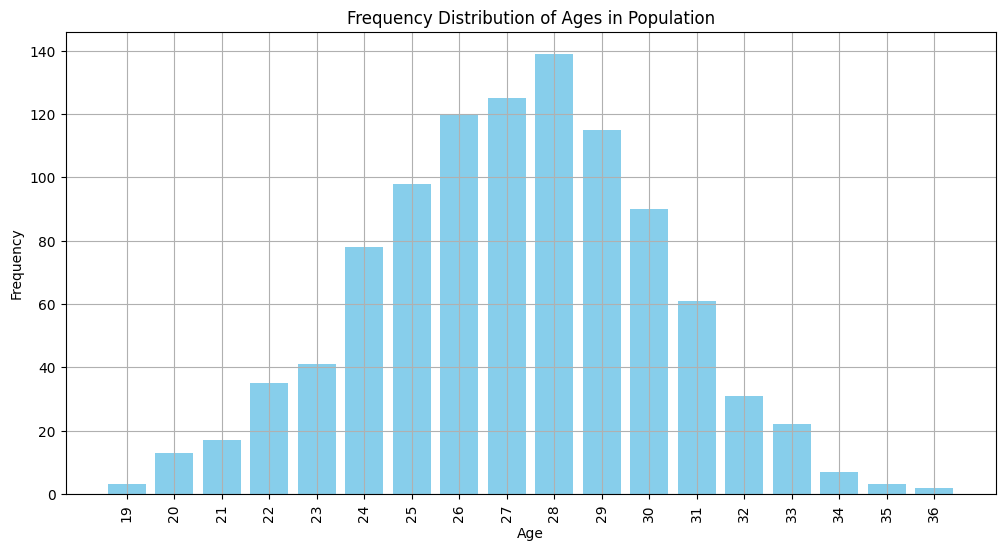

observation
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: count, dtype: int64


In [33]:
frequency_distribution = df['observation'].value_counts().sort_index()

# Step 3: Plot the frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages in Population')
plt.xticks(frequency_distribution.index, rotation=90)
plt.grid(True)
plt.show()

# Step 4: Print the frequency distribution to see the detailed data
print(frequency_distribution)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
El interval de edades es menor en el segundo dataset
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [34]:
# your code here
mean_age = df['observation'].mean()
std_dev_age = df['observation'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")

Mean Age: 27.155
Standard Deviation of Age: 2.9698139326891835


In [ ]:
"""
La edad media es menor en el segundo dataset, la deviacion estandard tambien
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [35]:
# your code here
df = pd.read_csv('/Users/paksivatkinavaleria/Desktop/bootcamp_ironhack/Modulo 2/lab_understanding_descriptive_stats-main/data/ages_population3.csv')
df

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


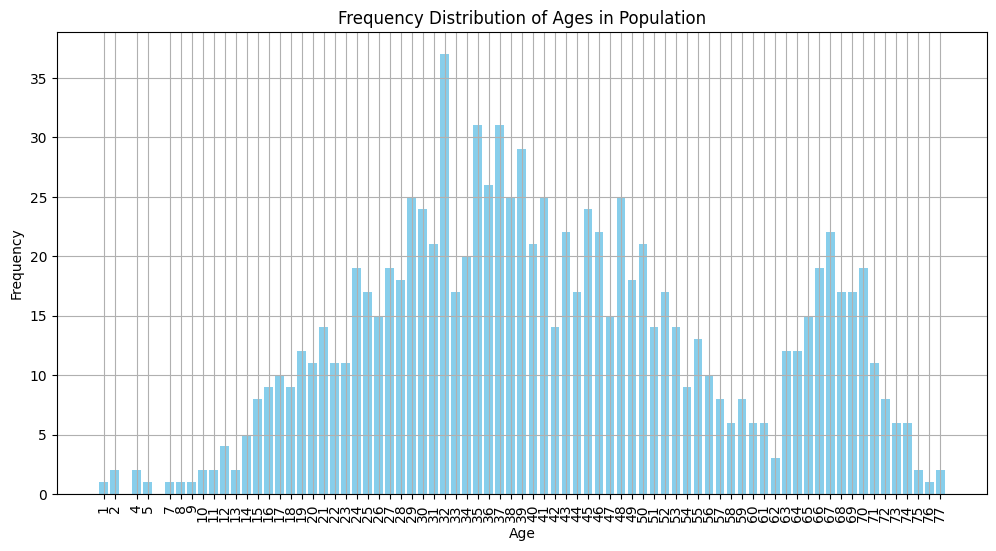

observation
1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: count, Length: 75, dtype: int64


In [37]:
frequency_distribution = df['observation'].value_counts().sort_index()

# Step 3: Plot the frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages in Population')
plt.xticks(frequency_distribution.index, rotation=90)
plt.grid(True)
plt.show()

# Step 4: Print the frequency distribution to see the detailed data
print(frequency_distribution)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [36]:
# your code here
mean_age = df['observation'].mean()
std_dev_age = df['observation'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")

Mean Age: 41.989
Standard Deviation of Age: 16.14470595986593


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [38]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Second quartile (Q2) - the median
    Q2 = calculate_median(sorted_data)

    # First quartile (Q1) - median of the lower half
    lower_half = sorted_data[:n//2]
    Q1 = calculate_median(lower_half)

    # Third quartile (Q3) - median of the upper half
    if n % 2 == 0:
        upper_half = sorted_data[n//2:]
    else:
        upper_half = sorted_data[n//2 + 1:]
    Q3 = calculate_median(upper_half)

    # Fourth quartile (Q4) - maximum value
    Q4 = max(sorted_data)

    return Q1, Q2, Q3, Q4

In [40]:
calculate_quartiles(df['observation'])

(30.0, 40.0, 53.0, 77.0)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [41]:
# your code here
def calculate_percentile(sorted_data, percentile):
    k = (len(sorted_data) - 1) * (percentile / 100)
    f = int(k)
    c = k - f
    if f + 1 < len(sorted_data):
        return sorted_data[f] + (c * (sorted_data[f + 1] - sorted_data[f]))
    else:
        return sorted_data[f]

def calculate_quartiles_and_percentiles(data):
    sorted_data = sorted(data)
    
    Q1 = calculate_percentile(sorted_data, 25)
    Q2 = calculate_percentile(sorted_data, 50)
    Q3 = calculate_percentile(sorted_data, 75)
    
    P10 = calculate_percentile(sorted_data, 10)
    P90 = calculate_percentile(sorted_data, 90)
    
    return {
        'Q1': Q1,
        'Q2': Q2,
        'Q3': Q3,
        'P10': P10,
        'P90': P90
    }

In [42]:
calculate_quartiles_and_percentiles(df['observation'])

{'Q1': 30.0, 'Q2': 40.0, 'Q3': 53.0, 'P10': 22.0, 'P90': 67.0}